# 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/maitran/Documents/Grad Rate NY 2022'

In [49]:
# Import clean data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'county_rec_cleaned.csv'), index_col = 0)

## 2. Data Cleaning

In [50]:
df.columns

Index(['county_name', 'membership_desc', 'subgroup_name', 'enroll_count',
       'grad_count', 'local_count', 'regents_diploma_count',
       'regents_advanced_count', 'non_diploma_credential_count',
       'still_enroll_count', 'ged_count', 'dropout_count'],
      dtype='object')

In [51]:
df.shape

(159407, 12)

In [52]:
df.head()

,county_name,membership_desc,subgroup_name,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count
1103,Albany,2016 Total Cohort - 6 Year Outcome,American Indian or Alaska Native,8,6.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0
1104,Albany,2016 Total Cohort - 6 Year Outcome,Asian or Native Hawaiian/Other Pacific Islander,284,272.0,1.0,62.0,209.0,2.0,2.0,0.0,8.0
1105,Albany,2016 Total Cohort - 6 Year Outcome,Black or African American,651,537.0,26.0,378.0,133.0,12.0,27.0,6.0,69.0
1106,Albany,2016 Total Cohort - 6 Year Outcome,Hispanic or Latino,247,200.0,12.0,117.0,71.0,5.0,5.0,2.0,35.0
1108,Albany,2016 Total Cohort - 6 Year Outcome,Multiracial,102,88.0,1.0,46.0,41.0,0.0,2.0,0.0,12.0


In [53]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159407 entries, 1103 to 221865
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   county_name                   159407 non-null  object 
 1   membership_desc               159407 non-null  object 
 2   subgroup_name                 159407 non-null  object 
 3   enroll_count                  159407 non-null  int64  
 4   grad_count                    159407 non-null  float64
 5   local_count                   159407 non-null  float64
 6   regents_diploma_count         159407 non-null  float64
 7   regents_advanced_count        159407 non-null  float64
 8   non_diploma_credential_count  159407 non-null  float64
 9   still_enroll_count            159407 non-null  float64
 10  ged_count                     159407 non-null  float64
 11  dropout_count                 159407 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory

,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count
count,159407.000000,159407.000000,159407.000000,159407.000000,159407.000000,159407.000000,159407.000000,159407.000000,159407.000000
mean,114.169579,102.076879,1.931151,51.247091,48.898637,0.720671,4.043674,0.744290,6.521828
std,144.217995,130.768657,4.264235,66.645557,82.438849,1.974228,10.195946,2.247068,12.646081
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,22.000000,0.000000,13.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,64.000000,56.000000,0.000000,30.000000,16.000000,0.000000,1.000000,0.000000,2.000000
75%,133.000000,121.000000,2.000000,62.000000,54.000000,1.000000,4.000000,1.000000,7.000000
max,999.000000,984.000000,49.000000,742.000000,902.000000,61.000000,218.000000,58.000000,312.000000


In [54]:
# Check for missing values
df.isnull().sum()

county_name                     0
membership_desc                 0
subgroup_name                   0
enroll_count                    0
grad_count                      0
local_count                     0
regents_diploma_count           0
regents_advanced_count          0
non_diploma_credential_count    0
still_enroll_count              0
ged_count                       0
dropout_count                   0
dtype: int64

In [62]:
dups = df.duplicated()

In [63]:
dups.shape # No dups

(159407,)

## 3. Data prep for regression analysis 

#### Hypothesis 1: If the count of student with regents diploma increases, the grad count in that county also increases.

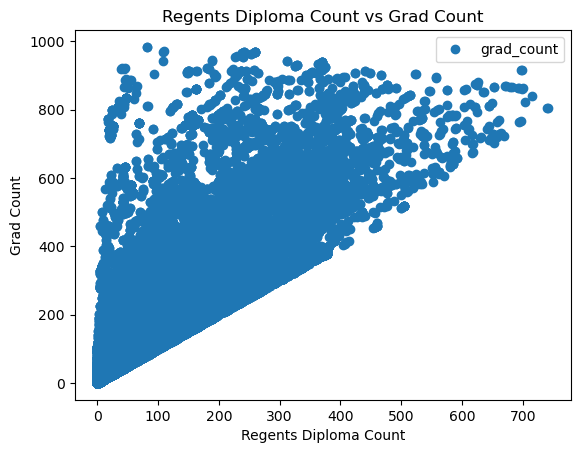

In [55]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'regents_diploma_count', y='grad_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Regents Diploma Count vs Grad Count')  
plt.xlabel('Regents Diploma Count')  
plt.ylabel('Grad Count')  
plt.show()

In [56]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['regents_diploma_count'].values.reshape(-1,1)
y = df['grad_count'].values.reshape(-1,1)

In [57]:
X

array([[  2.],
       [ 62.],
       [378.],
       ...,
       [ 24.],
       [ 24.],
       [ 24.]])

In [58]:
y

array([[  6.],
       [272.],
       [537.],
       ...,
       [ 30.],
       [ 30.],
       [ 30.]])

In [59]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [60]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [61]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


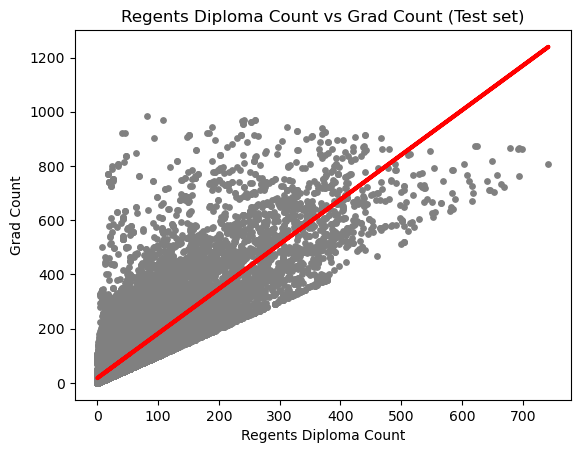

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regents Diploma Count vs Grad Count (Test set)')
plot_test.xlabel('Regents Diploma Count')
plot_test.ylabel('Grad Count')
plot_test.show()

Observations: The linear model represented by the red regression line doesn’t perfectly cover all of the data points. In the area where the regents diploma count is high (500), for example, there are still many data points that indicate low grad counr, which contradicts the hypothesis.

In [67]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [68]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.64585569]]
Mean squared error:  5214.894404985095
R2 score:  0.6942628332853266


Observations: A positive slope (1.65) indicates a positive relationship between those 2 variables(as X rises, so does y). MSE is small (5214) compared to the whole data frame with 159407 rows. It means that the regression line passes fairly close to the observations, making it a good fit. The R2 score for the model is 0.6942. This as about 70% percentage out of one hundred. This means that the model is not a bad fit.

In [69]:
y_predicted

array([[106.6676214 ],
       [ 90.20906455],
       [ 75.39636339],
       ...,
       [401.27578904],
       [ 40.833394  ],
       [ 40.833394  ]])

In [71]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,464.0,106.667621
1,51.0,90.209065
2,106.0,75.396363
3,18.0,32.604116
4,62.0,75.396363
5,111.0,100.084199
6,224.0,368.358675
7,307.0,167.564282
8,76.0,90.209065
9,319.0,131.355457


Observations: However, there’s quite the difference between the actual and predicted y values. This shows that the model isn’t doing a great job of explaining the relationship between the “Regents Diploma count” and "Grad count” variables. The relationship simply doesn’t follow a single, straight regression line.